In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
DATA_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/final_numpy/")
regions = ["anwr", "ivotuk_north", "ivotuk_south", "prudhoebay"]

In [3]:
def scatter_plot(x, y, xlabel = "", ylabel = "", title = "", linr_model=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, alpha=0.01)
    if linr_model is not None:
        x = np.linspace(np.min(x), np.max(x), 100, endpoint=True)
        y = linr_model.coef_ * x + linr_model.intercept_
        variance = r2_score(y_true = arr[:, 1], y_pred = linr_model.predict(np.expand_dims(arr[:, 0], 1)))
        plt.plot(x, y, color = "red")
        stats = f', y={linr_model.coef_[0]:0.5f} * x + {linr_model.intercept_:0.5f}, R^2 = {variance}'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title+stats)
    plt.savefig(DATA_DIR / title)

plotting...


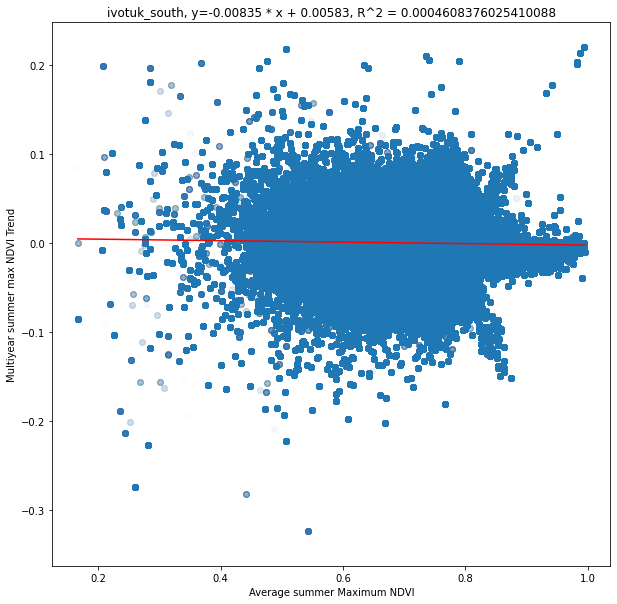

In [9]:
region = regions[2]
fname = region+".npy"
arr = np.float32(np.load(DATA_DIR / fname))
linr_model = LinearRegression().fit(np.expand_dims(arr[:, 0], 1), arr[:, 1])
print("plotting...")
scatter_plot(arr[:, 0], arr[:, 1], 
                xlabel = "Average summer Maximum NDVI", 
                ylabel = "Multiyear summer max NDVI Trend", 
                title = region,
                linr_model = linr_model)